### Predicting Salary - training a linear model to predict salary in datascience based on 2023 data

In [2]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=100)
torch.set_printoptions(linewidth=100, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 100)

In [3]:
# read dataframe
df = pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


<Axes: >

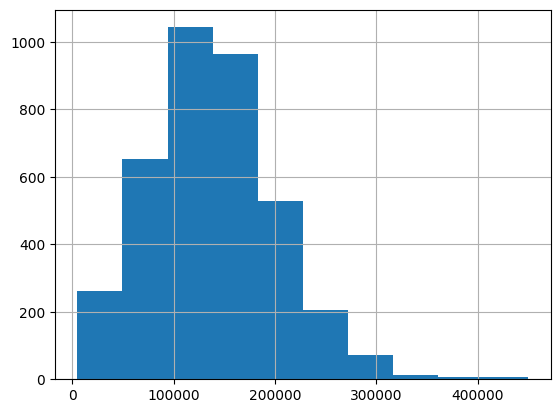

In [4]:
# look at distribution of salary in the dataset
df['salary_in_usd'].hist()

In [5]:
# look at unique employment types
pclasses = sorted(df.employment_type.unique())
pclasses

['CT', 'FL', 'FT', 'PT']

In [6]:
# describe data of the dataframe
df.describe(include=[object])

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


#### create dummy variables from categorical variables, here focusing on experiences level and employment type
- these dummy variables will be used to build the prediction model

In [7]:
df = pd.get_dummies(df, columns=["experience_level","employment_type"], dtype=int)
df.columns

Index(['work_year', 'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location', 'company_size',
       'experience_level_EN', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
       'employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT'],
      dtype='object')

In [8]:
added_cols = ['experience_level_EN']
df[added_cols].head()

,experience_level_EN
0,0
1,0
2,0
3,0
4,0


In [9]:
from torch import tensor
t_dep = tensor(df.salary_in_usd)

In [10]:
# By converting the salary values to a PyTorch tensor, 
## you can potentially perform various numerical operations, 
## computations, or use it as input for a machine learning model in the PyTorch framework.

In [11]:
indep_cols = ['experience_level_EN', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
       'employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT']
t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep
#t_indep is a PyTorch tensor object that holds the values of the selected columns from the DataFrame df. 
# The tensor allows for efficient numerical computations and can be used as input for various machine learning 
# models or other mathematical operations within the PyTorch framework.

tensor([[0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        ...,
        [0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.]])

In [12]:
t_indep.shape

torch.Size([3755, 8])

In [13]:
torch.manual_seed(442) # for reproducability 

n_coeff = t_indep.shape[1] # get numbers of coeffs we need to generate
coeffs = torch.rand(n_coeff)-0.5
# coeffs = torch.rand(n_coeff)-0.5 generates random numbers between 0 and 1 using torch.rand(n_coeff), 
# and then subtracts 0.5 from each number. This will produce a tensor named coeffs containing random 
# coefficients centered around 0. These coefficients can be used for various purposes, such as initializing 
# weights in a neural network or as coefficients in a mathematical equation.
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136])

In [14]:
t_indep*coeffs # apply weighting or scaling to the input data or to introduce random variations.

tensor([[-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.2409, -0.0000, -0.2632, -0.0000,  0.0000,  0.0000],
        [-0.0000,  0.0000,  0.2409, -0.0000, -0.2632, -0.0000,  0.0000,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        ...,
        [-0.0000,  0.0000,  0.2409, -0.0000, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.0000, -0.2262, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.0000,  0.0000,  0.2409, -0.0000, -0.0000, -0.0000,  0.4876,  0.0000],
        [-0.4629,  0.0000,  0.0000, -0.0000, -0.0000, -0.0000,  0.4876,  0.0000],
   

In [15]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals
#normalizing the t_indep tensor by dividing each element in the tensor by the maximum 
# value found in each column. This normalization process scales the values between 0 and 1, 
# making them relative to the maximum value in each column. It can be useful to ensure that 
# the values across different columns are on a similar scale or to facilitate convergence during 
# training in machine learning models. After this normalization step, the updated t_indep 
# tensor will contain the normalized values.


In [16]:
preds = (t_indep*coeffs).sum(axis=1)
#generate predictions by performing a weighted sum of the element-wise multiplied values from 
# t_indep and coeffs. Each row of t_indep is multiplied element-wise with the corresponding 
# row of coeffs, and the resulting values are summed up to obtain the predictions.

In [17]:
preds[:10]

tensor([ 0.2615, -0.0223, -0.0223,  0.2615,  0.2615,  0.2615,  0.2615,  0.2615,  0.2615,  0.2615])

In [18]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(137570.0469)

In [19]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

### Gradient decent

In [20]:
#Enabling gradient tracking is necessary when you want to compute gradients and 
# perform backpropagation to update the values of the tensor based on a loss function 
# or an optimization algorithm. By default, only tensors with requires_grad=True will 
# have their gradients computed during the backward pass in PyTorch.
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136],
       requires_grad=True)

In [21]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(137570.0469, grad_fn=<MeanBackward0>)

In [22]:
t_indep

tensor([[0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        ...,
        [0., 0., 1., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.]])

In [23]:
loss.backward()

In [24]:
coeffs.grad

tensor([-0.0852, -0.0304, -0.2144, -0.6700, -0.0027, -0.0027, -0.9901, -0.0045])

In [25]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-0.1704, -0.0607, -0.4288, -1.3401, -0.0053, -0.0053, -1.9803, -0.0091])

In [26]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(137569.5938)


In [27]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [28]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(3004, 751)

In [29]:
trn_indep

tensor([[0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0.]])

In [30]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [31]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [32]:
# By subtracting 0.5 from this tensor, each random number is shifted so that 
# the new range becomes -0.5 to 0.5. This means that the initialized coefficients 
# will have values that are centered around zero, which is often desirable in 
# machine learning algorithms.The subtraction of 0.5 is used to ensure that the 
# initialized coefficients are symmetrically distributed around zero, rather than 
# being skewed towards positive or negative values. This symmetry helps prevent 
# any systematic biases in the model's learning process and promotes more balanced 
# training.
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [33]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [34]:
coeffs = train_model(18, lr=0.2)

137335.594; 137335.266; 137334.984; 137334.703; 137334.375; 137334.109; 137333.797; 137333.500; 137333.219; 137332.906; 137332.609; 137332.328; 137332.031; 137331.703; 137331.438; 137331.125; 137330.812; 137330.531; 

In [35]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'experience_level_EN': tensor(-0.1465),
 'experience_level_EX': tensor(0.2536),
 'experience_level_MI': tensor(0.9827),
 'experience_level_SE': tensor(2.2006),
 'employment_type_CT': tensor(-0.2561),
 'employment_type_FL': tensor(-0.3051),
 'employment_type_FT': tensor(4.0517),
 'employment_type_PT': tensor(0.3327)}

### measureing accuracy

In [36]:
preds = calc_preds(coeffs, val_indep)

In [37]:
results = val_dep.bool()
results[:16]

tensor([True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,
        True])

In [38]:
results.float().mean()

tensor(1.)

In [39]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep))).float().mean()
acc(coeffs)

tensor(0.)

### using sigmoid

In [40]:
preds[:28]

tensor([5.0344, 6.2523, 5.0344, 6.2523, 6.2523, 6.2523, 6.2523, 6.2523, 6.2523, 6.2523, 5.0344,
        5.0344, 6.2523, 3.9051, 5.0344, 6.2523, 5.0344, 6.2523, 6.2523, 6.2523, 6.2523, 6.2523,
        6.2523, 6.2523, 5.0344, 3.9051, 5.0344, 6.2523])

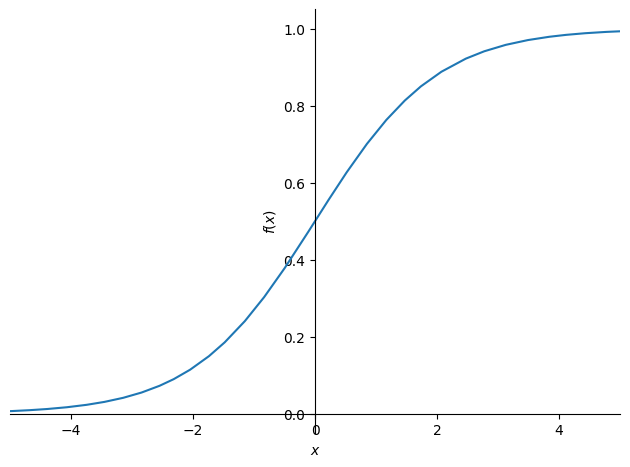

In [41]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

In [42]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [43]:
coeffs = train_model(lr=100)

137335.344; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 

In [44]:
acc(coeffs)

tensor(0.9907)

In [45]:
show_coeffs()

{'experience_level_EN': tensor(2.4564),
 'experience_level_EX': tensor(1.0658),
 'experience_level_MI': tensor(4.8465),
 'experience_level_SE': tensor(16.3396),
 'employment_type_CT': tensor(0.0124),
 'employment_type_FL': tensor(-0.1096),
 'employment_type_FT': tensor(24.2637),
 'employment_type_PT': tensor(1.0747)}

### using matrix product

In [47]:
(val_indep*coeffs).sum(axis=1)

tensor([29.1102, 40.6033, 29.1102, 40.6033, 40.6033, 40.6033, 40.6033, 40.6033, 40.6033, 40.6033,
        29.1102, 29.1102, 40.6033, 26.7201, 29.1102, 40.6033, 29.1102, 40.6033, 40.6033, 40.6033,
        40.6033, 40.6033, 40.6033, 40.6033, 29.1102, 26.7201, 29.1102, 40.6033, 40.6033, 40.6033,
        40.6033, 26.7201, 25.3295, 26.7201, 40.6033, 40.6033, 26.7201, 40.6033, 29.1102, 29.1102,
        40.6033, 26.7201, 29.1102, 40.6033, 25.3295, 26.7201, 40.6033, 29.1102, 40.6033, 29.1102,
        40.6033, 40.6033, 29.1102, 29.1102, 40.6033, 40.6033, 29.1102, 40.6033, 40.6033, 40.6033,
        40.6033, 40.6033, 29.1102, 29.1102, 26.7201, 40.6033, 29.1102, 26.7201, 40.6033, 40.6033,
        29.1102, 40.6033, 40.6033, 40.6033, 29.1102, 40.6033, 40.6033, 26.7201, 40.6033, 40.6033,
        40.6033, 29.1102, 29.1102, 40.6033, 40.6033, 40.6033, 25.3295, 40.6033, 40.6033,  2.4689,
        40.6033, 25.3295, 40.6033, 29.1102, 40.6033, 40.6033, 29.1102, 29.1102, 40.6033, 29.1102,
        29.1102, 40.

In [48]:
val_indep@coeffs

tensor([29.1102, 40.6033, 29.1102, 40.6033, 40.6033, 40.6033, 40.6033, 40.6033, 40.6033, 40.6033,
        29.1102, 29.1102, 40.6033, 26.7201, 29.1102, 40.6033, 29.1102, 40.6033, 40.6033, 40.6033,
        40.6033, 40.6033, 40.6033, 40.6033, 29.1102, 26.7201, 29.1102, 40.6033, 40.6033, 40.6033,
        40.6033, 26.7201, 25.3295, 26.7201, 40.6033, 40.6033, 26.7201, 40.6033, 29.1102, 29.1102,
        40.6033, 26.7201, 29.1102, 40.6033, 25.3295, 26.7201, 40.6033, 29.1102, 40.6033, 29.1102,
        40.6033, 40.6033, 29.1102, 29.1102, 40.6033, 40.6033, 29.1102, 40.6033, 40.6033, 40.6033,
        40.6033, 40.6033, 29.1102, 29.1102, 26.7201, 40.6033, 29.1102, 26.7201, 40.6033, 40.6033,
        29.1102, 40.6033, 40.6033, 40.6033, 29.1102, 40.6033, 40.6033, 26.7201, 40.6033, 40.6033,
        40.6033, 29.1102, 29.1102, 40.6033, 40.6033, 40.6033, 25.3295, 40.6033, 40.6033,  2.4689,
        40.6033, 25.3295, 40.6033, 29.1102, 40.6033, 40.6033, 29.1102, 29.1102, 40.6033, 29.1102,
        29.1102, 40.

In [49]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [50]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [51]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [52]:
coeffs = train_model(lr=100)

137335.406; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 

In [53]:
acc(coeffs)

tensor(0.9907)

### Neural network

In [54]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [55]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [56]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [57]:
coeffs = train_model(lr=1.4)

137335.203; 137335.062; 137334.984; 137334.953; 137334.938; 137334.938; 137334.938; 137334.938; 137334.938; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 

In [58]:
coeffs = train_model(lr=20)

137335.203; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 

In [59]:
acc(coeffs)

tensor(0.)

### Deeplearning

In [60]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [61]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [62]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [63]:
coeffs = train_model(lr=4)

137335.391; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 137334.922; 

In [64]:
acc(coeffs)

tensor(1.)